In [1]:
# Importar paquetes necesarios
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

In [2]:
def test_function(name_funcion: str, value_point: list = (0, 0)) -> np.array:
    x, y = value_point

    match name_funcion:
        case "esfera":
            return x**2 + y**2
        case "rastrigin":
            return (
                20
                + x**2
                - 10 * np.cos(2 * np.pi * x)
                + y**2
                - 10 * np.cos(2 * np.pi * y)
            )
        case "rosenbrock":
            return (y - x**2) ** 2 + (1 - x) ** 2
        case "booth":
            return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
        case "matyas":
            return 0.26 * (x**2 + y**2) - 0.48 * x * y

In [3]:
class Particle:
    """Creacion de particula"""

    def __init__(self, limites, nv, w, c1, c2, fitness_inicial):
        self.nv = nv
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.posicion_particula = []
        self.velocidad_particula = []
        self.mejor_posicion_local_particula = []
        self.fitness_mejor_posicion_local_particula = fitness_inicial
        self.fitness_posicion_particula = fitness_inicial

        for i in range(self.nv):
            self.posicion_particula.append(random.uniform(limites[i][0], limites[i][1]))
            self.velocidad_particula.append(random.uniform(-1, 1))

    def evaluate(self, funcion_objetivo):
        self.fitness_posicion_particula = funcion_objetivo(self.posicion_particula)
        if (
            self.fitness_posicion_particula
            < self.fitness_mejor_posicion_local_particula
        ):
            self.mejor_posicion_local_particula = self.posicion_particula
            self.fitness_mejor_posicion_local_particula = (
                self.fitness_posicion_particula
            )

    def actualizar_velocidad(self, global_mejor_posicion_particula):
        for i in range(self.nv):
            # tasas de evaporacion
            r1 = random.random()
            r2 = random.random()

            velocidad_cognitiva = (
                self.c1
                * r1
                * (self.mejor_posicion_local_particula[i] - self.posicion_particula[i])
            )
            velocidad_social = (
                self.c2
                * r2
                * (global_mejor_posicion_particula[i] - self.posicion_particula[i])
            )
            self.velocidad_particula[i] = (
                self.w * self.velocidad_particula[i]
                + velocidad_cognitiva
                + velocidad_social
            )

    def actualizar_posicion(self, limites):
        for i in range(self.nv):
            self.posicion_particula[i] = (
                self.posicion_particula[i] + self.velocidad_particula[i]
            )

            if self.posicion_particula[i] > limites[i][1]:
                self.posicion_particula[i] = limites[i][1]

            if self.posicion_particula[i] < limites[i][0]:
                self.posicion_particula[i] = limites[i][0]


class PSO:
    def __init__(
        self,
        funcion_objetivo: list,
        particle_size: int,
        iteraciones: int,
        limites: list = [(-5.12, 5.12), (-5.12, 5.12)],
        inercia: float = 0.8,
        cognitiva: float = 1,
        social: float = 2,
        num_variables: int = 2,
    ):
        fitness_inicial = float("inf")
        self.nv = num_variables  # number of variables
        self.w = inercia  # inertia constant
        self.c1 = cognitiva  # cognative constant
        self.c2 = social  # social constant
        self.funcion_objetivo = funcion_objetivo
        self.particle_size = particle_size
        self.iteraciones = iteraciones
        self.limites = limites
        self.fitness_global_mejor_posicion_particula = fitness_inicial
        self.global_mejor_posicion_particula = []
        self.enjambre_particulas = []
        self.minimos = []
        self.minimizadores = []
        for i in range(self.particle_size):
            self.enjambre_particulas.append(
                Particle(
                    self.limites, self.nv, self.w, self.c1, self.c2, fitness_inicial
                )
            )

        for i in range(self.iteraciones):
            for j in range(self.particle_size):
                self.enjambre_particulas[j].evaluate(self.funcion_objetivo)
                if (
                    self.enjambre_particulas[j].fitness_posicion_particula
                    < self.fitness_global_mejor_posicion_particula
                ):
                    self.global_mejor_posicion_particula = list(
                        self.enjambre_particulas[j].posicion_particula
                    )
                    self.fitness_global_mejor_posicion_particula = float(
                        self.enjambre_particulas[j].fitness_posicion_particula
                    )
            self.minimos.append(self.fitness_global_mejor_posicion_particula)
            self.minimizadores.append(self.global_mejor_posicion_particula)

            for j in range(self.particle_size):
                self.enjambre_particulas[j].actualizar_velocidad(
                    self.global_mejor_posicion_particula
                )
                self.enjambre_particulas[j].actualizar_posicion(self.limites)

        print("Resultado:")
        print("Minimo encontrado: ", self.global_mejor_posicion_particula)
        print(
            "minimizadores encontrados: ", self.fitness_global_mejor_posicion_particula
        )

In [4]:
name_function = "rosenbrock"
particle_size = 120  # number of particles
iterations = 200  # max number of iterations


def objective_function(point):
    return test_function(name_function, point)


random.seed(4)
pso = PSO(objective_function, particle_size, iterations)

Resultado:
Minimo encontrado:  [1.0000017607542482, 1.000003534147342]
minimizadores encontrados:  3.1004151845541266e-12


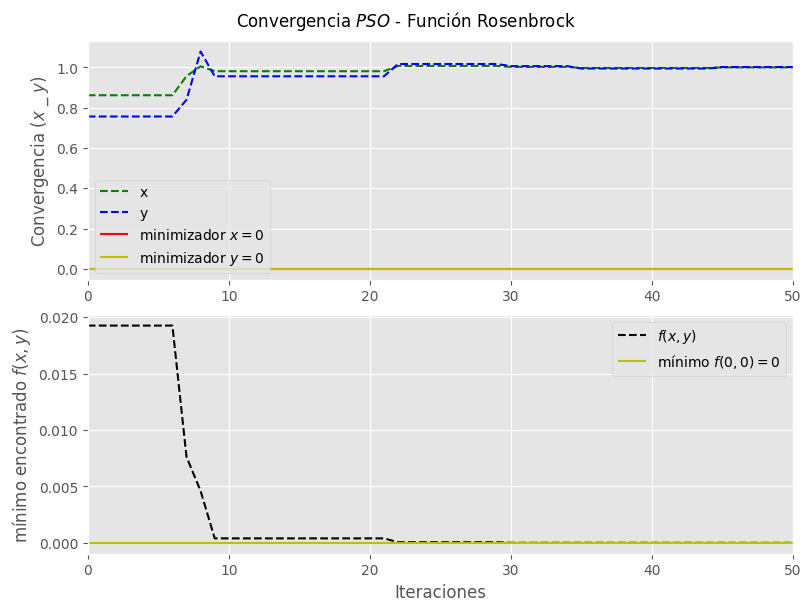

In [5]:
plt.style.use("ggplot")
xmax = 50
fig, (ax1, ax2) = plt.subplots(2, 1, layout="constrained", figsize=(8, 6))
fig.suptitle(rf"Convergencia $PSO$ - Función {name_function.capitalize()}")
ax1.plot([p[0] for p in pso.minimizadores], "g--", label="x")
ax1.plot([p[1] for p in pso.minimizadores], "b--", label="y")
ax1.hlines(y=0, xmin=0, xmax=xmax, colors="r", label=r"minimizador $x=0$")
ax1.hlines(y=0, xmin=0, xmax=xmax, colors="y", label=r"minimizador $y=0$")
ax1.set_ylabel(r"Convergencia $(x$ _ $y)$")
ax1.legend()
ax1.grid(True)
ax2.plot(pso.minimos, "k--", label=r"$f(x,y)$")
ax2.hlines(y=0, xmin=0, xmax=xmax, colors="y", label="mínimo $f(0,0)=0$")
ax2.set_ylabel(r"mínimo encontrado $f(x,y)$")
ax2.set_xlabel("Iteraciones")
ax1.set_xlim(0, xmax)
ax2.set_xlim(0, xmax)
ax2.grid(True)
ax2.legend()
plt.show()

In [6]:
def contorno(name_function, xm, ym):
    plt.style.use("ggplot")
    v = np.linspace(-5.12, 5.12, 100)
    X, Y = np.meshgrid(v, v)
    Z = test_function(name_function, [X, Y])
    fig, ax = plt.subplots(figsize=(6, 6))
    cmp = cm.inferno
    ax.contourf(v, v, Z, 50, cmap=cmp, alpha=0.8, antialiased=True)
    ax.plot(xm, ym, "y*--", markersize=15)
    ax.set_title(
        rf"""Function test ${name_function.capitalize()}$
        Mínimo Global $f(0,0) = 0$"""
    )
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    plt.show()

200 0.8618885793332973 1.0072259079182733
200 0.7563722986234378 1.07902720411484


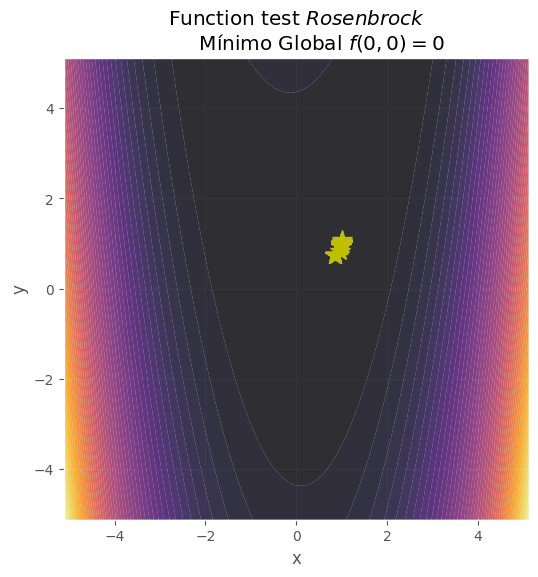

In [7]:
x = [mx[0] for mx in pso.minimizadores]
print(len(x), min(x), max(x))
y = [mx[1] for mx in pso.minimizadores]
print(len(x), min(y), max(y))

contorno(name_function, x, y)

In [8]:
random.seed(6)
iteraciones = 21
minimos_values = []
print(f"{iteraciones} iteraciones", "->", "minimizador (x,y)", "->", "mínimo f(x,y)")

for _ in range(iteraciones):
    pso = PSO(objective_function, particle_size, iterations)
    minimos_values.append(pso.fitness_global_mejor_posicion_particula)

print("     ")
print("Promedio de mínimos:", np.mean(minimos_values))
print("mediana de mínimos:", np.median(minimos_values))
print("desviación STD de mínimos:", np.std(minimos_values))
print("valor mínimo:", np.min(minimos_values))
print("valor máximo:", np.max(minimos_values))

21 iteraciones -> minimizador (x,y) -> mínimo f(x,y)
Resultado:
Minimo encontrado:  [0.9999996612238099, 0.9999984929488479]
minimizadores encontrados:  8.028377099986808e-13
Resultado:
Minimo encontrado:  [1.0000001815515522, 1.0000006474549048]
minimizadores encontrados:  1.1381689378019826e-13
Resultado:
Minimo encontrado:  [0.9999996464483609, 0.999999775865237]
minimizadores encontrados:  3.582572273966125e-13
Resultado:
Minimo encontrado:  [0.9999996692692451, 1.0000001226697806]
minimizadores encontrados:  7.242445412278177e-13
Resultado:
Minimo encontrado:  [1.00000001676264, 0.9999986225936334]
minimizadores encontrados:  1.991009097868103e-12
Resultado:
Minimo encontrado:  [1.0000000188651945, 1.0000000903709123]
minimizadores encontrados:  3.126920207963334e-15
Resultado:
Minimo encontrado:  [0.9999984387705098, 0.999996324762051]
minimizadores encontrados:  2.743004803882879e-12
Resultado:
Minimo encontrado:  [1.000000132642015, 1.0000002155356131]
minimizadores encontrados